# SMAI ASSIGNMENT 2 - Problem 1
## Srujana Vanka - 2020102005


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from random import randrange
from PIL import Image
from sklearn.decomposition import PCA
from tabulate import tabulate 

# 1.1 PCA

## Pre-processing the data

In [7]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [8]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [9]:
# Loading the dataset
data_path = '/home/sruj/Downloads/SMAI-Dataset-release/IIIT-CFW/IIIT-CFW'

# Image data in the X variable and the corresponding labels in the y variable.
X,y = load_data(data_path)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


Here, 672 is the number of samples in the dataset. Each sample is an individual data point. In this case, we have 672 images.
<br>
32 is the height of each image in pixels.
<br>
32 is the width of each image in pixels.
<br>
3 is the number of color channels (RGB) in each image.

**The total number of features (dimensions) for each image is:**

Number of Features = Height x Width x Number of Color Channels
<br>
Number of Features = 32 x 32 x 3 = 3072

## Perform dimensionality reduction on the IIIT-CFW dataset, varying the number of principle components.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


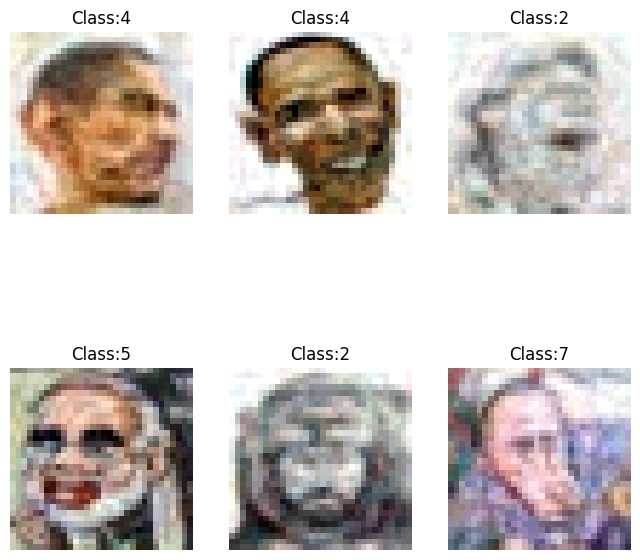

In [10]:
# Define the number of principal components to retain
num_principal_components = 200

# Reshape the image data and calculate the number of samples (N)
num_samples, height, width, channels = X.shape
X_reshaped = X.reshape(num_samples, -1)

# Create a PCA model with the specified number of components
pca_model = PCA(n_components=num_principal_components)

# Fit the PCA model to the flattened data
X_pca = pca_model.fit_transform(X_reshaped)

# Inverse transform the reduced data to the original dimensions
restored_images = pca_model.inverse_transform(X_pca)
restored_images = restored_images.reshape(num_samples, height, width, channels)

# Display a random subset of the restored images
random_indices = np.random.randint(0, y.shape[0], 6)
display_images(restored_images[random_indices, ...], y[random_indices], row=2, col=3)


## Plot the the relationship between the cumulative explained variance and the number of principal components

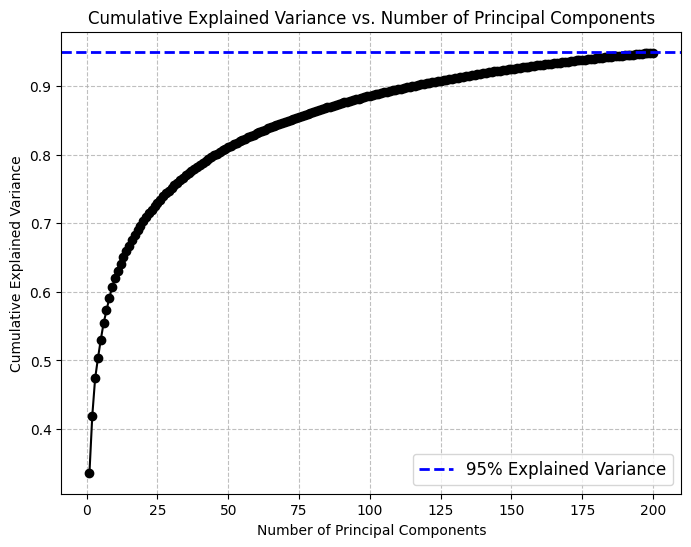

In [11]:
# Calculate the cumulative explained variance for each principal component
cumulative_variance = np.cumsum(pca_model.explained_variance_ratio_)

# Create the plot with custom style and colors
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_principal_components + 1), cumulative_variance, marker='o', markersize=6, color='black', linestyle='-')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True, linestyle='--', alpha=0.8)

# horizontal line for reference (e.g., 95% explained variance)
plt.axhline(y=0.95, color='b', linestyle='--', label='95% Explained Variance', linewidth=2)
plt.legend(loc='lower right', fontsize=12)
plt.show()


## Perform the dimensionality reduction on pictionary dataset

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset and extract the embeddings
path = '/home/sruj/Downloads/data.npy'
pictionary_dataset = np.load(path, allow_pickle=True)
encoding_types = ['ResNet', 'VIT']

# preprocess embeddings
def preprocess_embeddings(embeddings):
    # Ensure numerical data type
    embeddings = embeddings.astype(float)
    return embeddings

In [9]:

def dimensionality_reduction(embeddings, num_components):
    # Reshape embeddings to 2D
    N, H, W = embeddings.shape
    embeddings = embeddings.reshape(N, -1)
    
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(preprocess_embeddings(embeddings))
    
    return X_pca

def knn_evaluation(X_train, y_train, X_val, y_val, k=5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    # Predict on validation data
    y_pred = knn.predict(X_val)

    # Evaluate the classifier's performance
    accuracy = round(accuracy_score(y_val, y_pred), 4)
    precision = round(precision_score(y_val, y_pred, average='weighted', zero_division=1), 4)
    recall = round(recall_score(y_val, y_pred, average='weighted', zero_division=1), 4)
    f1 = round(f1_score(y_val, y_pred, average='weighted'), 4)
    
    return accuracy, precision, recall, f1


ans = []

for encoding_type in encoding_types:
    if encoding_type == 'ResNet':
        embeddings = np.array([item[1] for item in pictionary_dataset])
    elif encoding_type == 'VIT':
        embeddings = np.array([item[2] for item in pictionary_dataset])

    label_names = np.array([item[3] for item in pictionary_dataset])

    X_pca = dimensionality_reduction(embeddings, num_components=100)

    # Split data into training and validation subsets
    X_train, X_val, y_train, y_val = train_test_split(X_pca, label_names, test_size=0.3, random_state=42)

    accuracy, precision, recall, f1 = knn_evaluation(X_train, y_train, X_val, y_val, k=5)

    # Append results to the list
    ans.append((encoding_type, accuracy, precision, recall, f1))

# Print the results table
print("Distance Metric = Euclidean")
headers = ['Encoding Type', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
print(tabulate(ans, headers=headers, tablefmt='pretty'))

Distance Metric = Euclidean
+---------------+----------+-----------+--------+----------+
| Encoding Type | Accuracy | Precision | Recall | F1 Score |
+---------------+----------+-----------+--------+----------+
|    ResNet     |  0.1444  |  0.5658   | 0.1444 |  0.1334  |
|      VIT      |  0.2067  |  0.5413   | 0.2067 |  0.1883  |
+---------------+----------+-----------+--------+----------+


## Observe the impact of dimensionality reduction on the dataset - CFW dataset

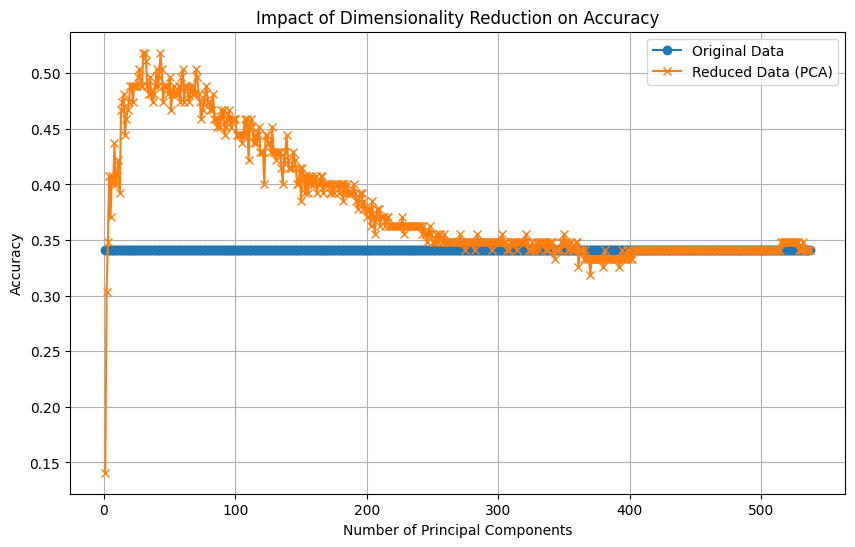

In [13]:

# Calculate the number of features (flattened image size)
num_features = X.shape[1] * X.shape[2] * X.shape[3]

# Reshape the images to a 2D format
X_reshaped = X.reshape(X.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the range of components to test, limited to the minimum of samples and features
n_components_range = range(1, min(X_train.shape[0], num_features) + 1)
accuracies_before_reduction = []
accuracies_after_reduction = []

for n_components in n_components_range:
    # PCA
    pca = PCA(n_components=n_components)

    # Classifier on Original Dataset
    knn_classifier_before_reduction = KNeighborsClassifier(n_neighbors=5)
    knn_classifier_before_reduction.fit(X_train, y_train)
    y_pred_before_reduction = knn_classifier_before_reduction.predict(X_test)
    accuracy_before_reduction = accuracy_score(y_test, y_pred_before_reduction)
    accuracies_before_reduction.append(accuracy_before_reduction)

    # Classifier on Dataset after PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn_classifier_after_reduction = KNeighborsClassifier(n_neighbors=5)
    knn_classifier_after_reduction.fit(X_train_pca, y_train)
    y_pred_after_reduction = knn_classifier_after_reduction.predict(X_test_pca)
    accuracy_after_reduction = accuracy_score(y_test, y_pred_after_reduction)
    accuracies_after_reduction.append(accuracy_after_reduction)

# Plot the accuracies vs. the number of principal components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, accuracies_before_reduction, label='Original Data', marker='o')
plt.plot(n_components_range, accuracies_after_reduction, label='Reduced Data (PCA)', marker='x')
plt.title('Impact of Dimensionality Reduction on Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Print and compare accuracies for different numbers of principal components
for n, acc_before, acc_after in zip(n_components_range, accuracies_before_reduction, accuracies_after_reduction):
    print(f'Components: {n}, Accuracy Before Reduction: {acc_before:.4f}, Accuracy After Reduction: {acc_after:.4f}')


Components: 1, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.1407
Components: 2, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.3037
Components: 3, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.3481
Components: 4, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4074
Components: 5, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.3704
Components: 6, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4074
Components: 7, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4000
Components: 8, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4370
Components: 9, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4000
Components: 10, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4074
Components: 11, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.4222
Components: 12, Accuracy Before Reduction: 0.3407, Accuracy After Reduction: 0.3926
C

# 1.2 Pictionary Dataset

## Perform PCA for both drawer and guesser. Plot the above features with respect to the obtained PCA axes

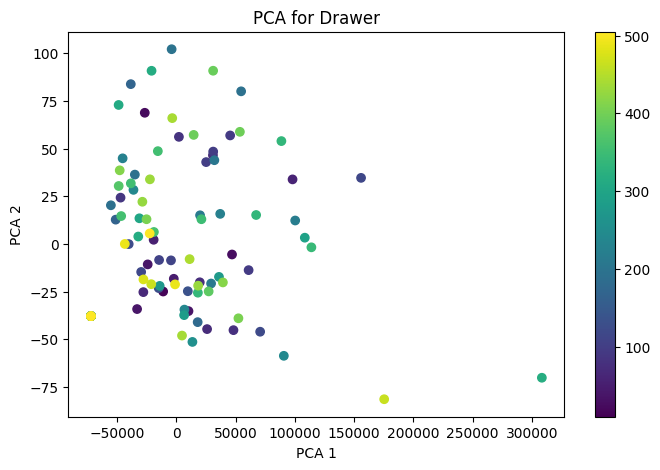

In [18]:
# Load the data
drawer_attributes = pd.read_csv("/home/sruj/Downloads/smai_assignment_pictionary/drawer_attributes.csv")
guesser_attributes = pd.read_csv("/home/sruj/Downloads/smai_assignment_pictionary/guesser_attributes.csv")

drawer_data = drawer_attributes.iloc[:, 1:].values
guesser_data = guesser_attributes.iloc[:, 1:].values

# Drawer
pca_drawer = PCA()
drawer_pca_result = pca_drawer.fit_transform(drawer_data)

plt.figure(figsize=(8, 5))
plt.scatter(drawer_pca_result[:, 0], drawer_pca_result[:, 1], c=drawer_attributes['d_drawer'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for Drawer')
plt.colorbar()


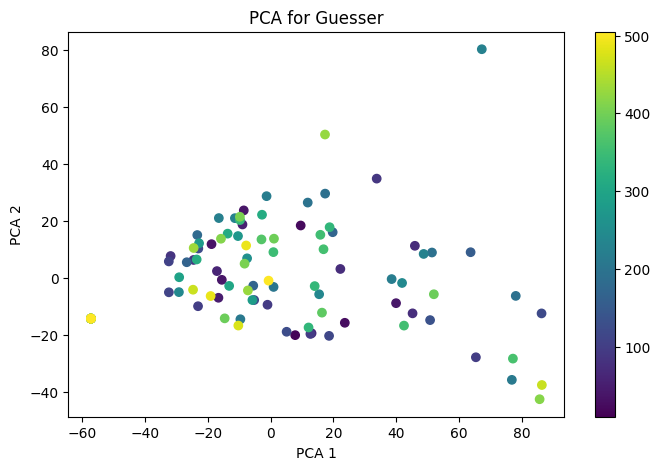

In [20]:
# Guesser
pca_guesser = PCA()
guesser_pca_result = pca_guesser.fit_transform(guesser_data)

plt.figure(figsize=(8, 5))
plt.scatter(guesser_pca_result[:, 0], guesser_pca_result[:, 1], c=guesser_attributes['g_guesser'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for Guesser')
plt.colorbar()


## What does each of the new axes that are obtained from PCA represent

The scatter plots generated from the PCA results tell us about the relationships and patterns in the data when projected onto the new principal component axes.

PC1 for Drawer attributes represents the most significant patterns or behaviors that differentiate one Drawer player from another. For Guesser attributes, it represents the most significant patterns in Guesser behavior.

PC2 for Drawer attributes represents the second most significant patterns or behaviors that differentiate players beyond what PC1 explains. For Guesser attributes, it represents the second most significant patterns in Guesser behavior.

**Each new axis obtained from PCA represents a different pattern or direction of variability in the data. These axes are ordered by importance, with PC1 explaining the most variance and subsequent components explaining less.**